## Collabrative Based Recommendation Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
ratings = pd.read_csv('ml-100k/u.data', sep='\t',
                     header=None,
                     names=['user_id', 'movie_id', 'ratings'],
                     usecols=[0, 1, 2])

In [9]:
ratings.head()

,user_id,movie_id,ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [11]:
ratings.user_id.unique().size

943

In [12]:
ratings.movie_id.unique().size

1682

In [13]:
ratings.ratings.mean()

3.52986

In [35]:
cols = "movie id | movie title | release date | video release date | IMDb URL | \
unknown | Action | Adventure | Animation | Children's | Comedy | Crime | \
Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | \
Romance | Sci-Fi | Thriller | War | Western"
cols = cols.split(' | ')

In [124]:
movie_title = pd.read_csv('ml-100k/u.item', sep='|',
                         encoding='latin', header=None,
                         names=['movie id', 'movie title'],
                         usecols=[0, 1],
                         index_col='movie id')
movie_title.head()

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


In [51]:
movies = pd.read_csv('ml-100k/u.item', sep='|',
                    encoding='latin', header=None,
                    names=cols, index_col='movie id')
movies.drop(['movie title', 'release date', 'video release date', 'IMDb URL', 'unknown'], axis=1,
           inplace=True)

In [53]:
movies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


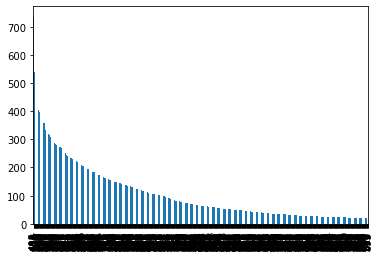

In [61]:
ratings.user_id.value_counts().plot(kind='bar')

In [62]:
ratings.head()

,user_id,movie_id,ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [77]:
movie_rating = ratings.groupby('movie_id').agg({'ratings': 'mean', 'user_id':'count'})


In [80]:
movie_rating.rename({'ratings': 'avg_rating', 'user_id':'count'}, axis=1, inplace=True)

In [81]:
movie_rating.head()

,avg_rating,count
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


### Popularity 

$$  \text {Min Max Scaling} = \frac {X_i - min(X)} {max(X) - min(X)} $$

In [85]:
# example for better understanding
x = [ 40, 60, 30, 10, 90, 100 ]

y = [ round((xi-min(x)) / (max(x) - min(x)), 2) for xi in x ]
print(x)
print(y)

[40, 60, 30, 10, 90, 100]
[0.33, 0.56, 0.22, 0.0, 0.89, 1.0]


In [88]:
movie_rating['count'].max()

583

In [89]:
movie_rating['count'].min()

1

In [90]:
movie_rating['count'].mean()

59.45303210463734

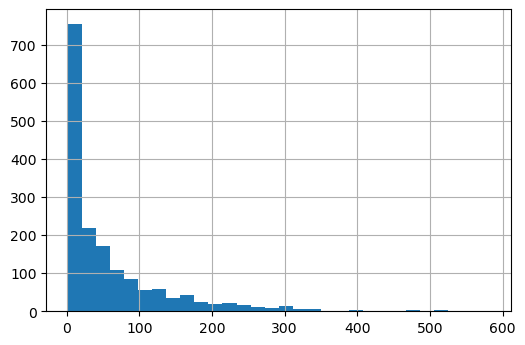

In [95]:
plt.figure(dpi=100)
movie_rating['count'].hist(bins=30)
plt.show()

In [93]:
movie_rating['count'].quantile(q=[0.25, 0.5, 0.75])

0.25     6.0
0.50    27.0
0.75    80.0
Name: count, dtype: float64

In [97]:
mi = movie_rating['count'].min()
mx = movie_rating['count'].max()

movie_rating['popularity'] = movie_rating['count'].apply(lambda v: round((v-mi)/(mx-mi), 2))

In [100]:
movie_rating.drop('count', axis=1, inplace=True)

In [121]:
movie_rating[movie_rating['popularity'] == 1].index.values[0]

50

In [101]:
movie_rating.head()

,avg_rating,popularity
movie_id,,
1,3.878319,0.77
2,3.206107,0.22
3,3.033333,0.15
4,3.550239,0.36
5,3.302326,0.15


In [102]:
movies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [104]:
movies.isna().sum()

Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [105]:
movie_rating.isna().sum()

avg_rating    0
popularity    0
dtype: int64

In [108]:
X = pd.merge(movies, movie_rating, left_index=True, right_index=True)

In [110]:
X.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,popularity
movie id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,0.77
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,0.15
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,0.15


In [115]:
# new_movie -> id, geners, avg_rating, popularity

#### 50 popular movies

In [134]:
ix_50 = movie_rating.sort_values('popularity', ascending=False)[:50].index

movie_title.loc[ix_50].head(20)

,movie title
movie_id,
50,Star Wars (1977)
100,Fargo (1996)
181,Return of the Jedi (1983)
258,Contact (1997)
294,Liar Liar (1997)
286,"English Patient, The (1996)"
288,Scream (1996)
1,Toy Story (1995)
300,Air Force One (1997)


In [139]:
movie_rating.loc[50]

avg_rating    4.358491
popularity    1.000000
Name: 50, dtype: float64

In [140]:
star_wars = X.loc[50]

In [141]:
star_wars

Action         1.000000
Adventure      1.000000
Animation      0.000000
Children's     0.000000
Comedy         0.000000
Crime          0.000000
Documentary    0.000000
Drama          0.000000
Fantasy        0.000000
Film-Noir      0.000000
Horror         0.000000
Musical        0.000000
Mystery        0.000000
Romance        1.000000
Sci-Fi         1.000000
Thriller       0.000000
War            1.000000
Western        0.000000
avg_rating     4.358491
popularity     1.000000
Name: 50, dtype: float64

In [142]:
v1 = [ 0, 1, 0, 1, 0]
v2 = [ 1, 0, 1, 1, 0]

In [160]:
from scipy.spatial.distance import cosine, euclidean


In [161]:
v1 = np.array([3.2, 0.5])
v2 = np.array([3.2, 0.5])

euclidean(v1, v2)

0.0

In [162]:
v1 = np.array([ 0, 1, 0, 1, 0])
v2 = np.array([ 1, 0, 1, 0, 1])
print(euclidean(v1, v2))
cosine(v1, v2)

2.23606797749979


1.0

In [163]:
v1 = np.array([ 0, 1, 0, 1, 0])
v2 = np.array([ 0, 1, 0, 1, 0])
print(euclidean(v1, v2))
cosine(v1, v2)

0.0


0.0

In [165]:
X.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,popularity
movie id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,0.77
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,0.15
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,0.15


In [164]:
def distance(v1, v2):
    return euclidean(v1, v2)

In [173]:
def similarMovies(mid, k=5):
    X_new = X.loc[mid].values
    result = []
    for ix, each_movie in zip(X.index, X.values):
        d = distance(X_new, each_movie)
        result.append( (d, ix) )
    result.sort()
    
    movie_ids = [ ix for d, ix in result[:k] ]
    return movie_title.loc[movie_ids]
        

In [174]:
similarMovies(50, k=10)

,movie title
movie id,
50,Star Wars (1977)
181,Return of the Jedi (1983)
172,"Empire Strikes Back, The (1980)"
498,"African Queen, The (1951)"
222,Star Trek: First Contact (1996)
228,Star Trek: The Wrath of Khan (1982)
271,Starship Troopers (1997)
82,Jurassic Park (1993)
121,Independence Day (ID4) (1996)


In [175]:
similarMovies(313, k=10)

,movie title
movie id,
313,Titanic (1997)
207,Cyrano de Bergerac (1990)
1483,"Man in the Iron Mask, The (1998)"
197,"Graduate, The (1967)"
275,Sense and Sensibility (1995)
14,"Postino, Il (1994)"
213,"Room with a View, A (1986)"
268,Chasing Amy (1997)
246,Chasing Amy (1997)


In [176]:
similarMovies(127, k=10)

,movie title
movie id,
127,"Godfather, The (1972)"
187,"Godfather: Part II, The (1974)"
56,Pulp Fiction (1994)
806,Menace II Society (1993)
182,GoodFellas (1990)
293,Donnie Brasco (1997)
504,Bonnie and Clyde (1967)
1194,Once Were Warriors (1994)
1191,"Letter From Death Row, A (1998)"
